In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
df_train
#欠損処理とダミー変数化をする

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
c=pd.get_dummies(df_train['Embarked'])
f =pd.get_dummies(df_train['Sex'])
f

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [4]:
b = df_train.drop("Embarked",axis=1)
g=b.drop("Sex",axis=1)
d=pd.concat([g,c], axis=1)
h=pd.concat([d,f], axis=1)
e=pd.DataFrame(h,columns=["PassengerId","Survived","Pclass","Name","female","male","Age","SibSp","Parch","Ticket","Fare","Cabin","C","Q","S"])
e
#cabinは欠損値が多すぎる上にダミー変数も入れられないのであまりやくに立たなそう。Ticket番号もpclassがあるし、そこまで重要ではなさそう。
#念のためダミー変数化しておいたがEmbarkedも乗った港で生死にそこまで影響があるとは考えにくい
#まずはpclassやFareで分類してみる。良い席の方が非常口が近かったり、使用人なども連れていて守られてそうだから
#次に子供や若い人、妻の方がが優先して救出してもらえそう。

,PassengerId,Survived,Pclass,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,NaN,0,0,1
5,6,0,3,"Moran, Mr. James",0,1,NaN,0,0,330877,8.4583,NaN,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,1,54.0,0,0,17463,51.8625,E46,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,1,2.0,3,1,349909,21.0750,NaN,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,14.0,1,0,237736,30.0708,NaN,1,0,0


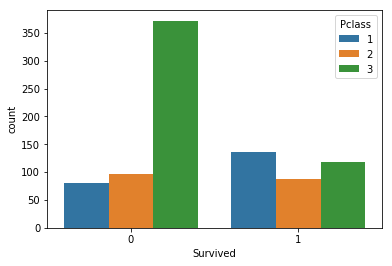

In [10]:
from collections import Counter
sns.countplot("Survived", data = df_train, hue = "Pclass")
#確かになくなった人の中ではpclassの3を買った人が多い

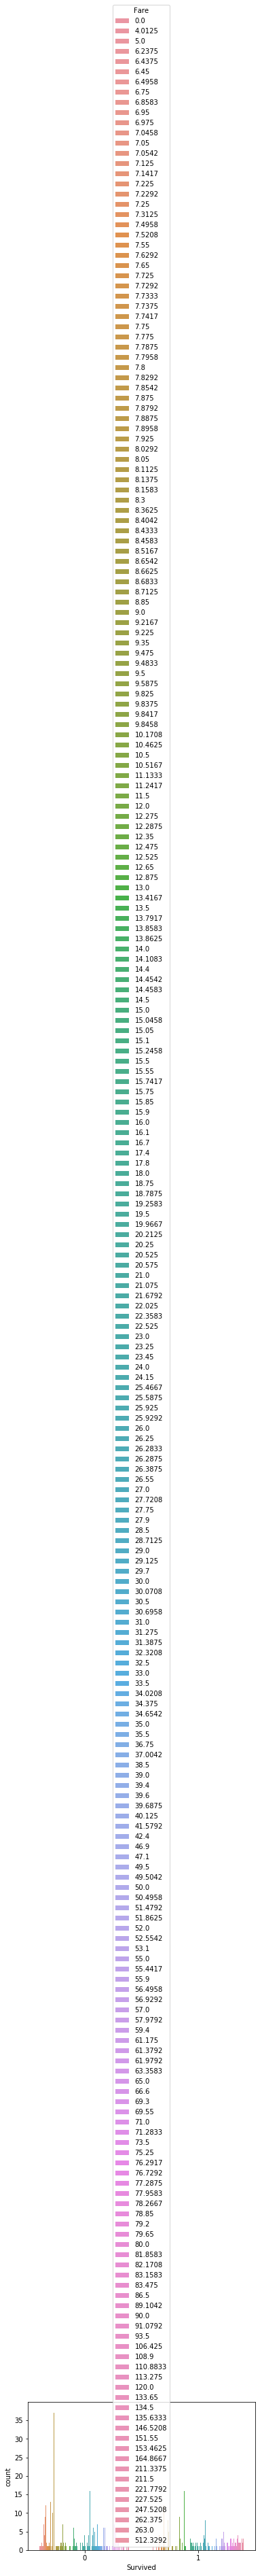

In [11]:
from collections import Counter
sns.countplot("Survived", data = df_train, hue = "Fare")
#確かになんとなくなくなった人の中にはFareが低い人が多そう

/Users/matuura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/matuura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


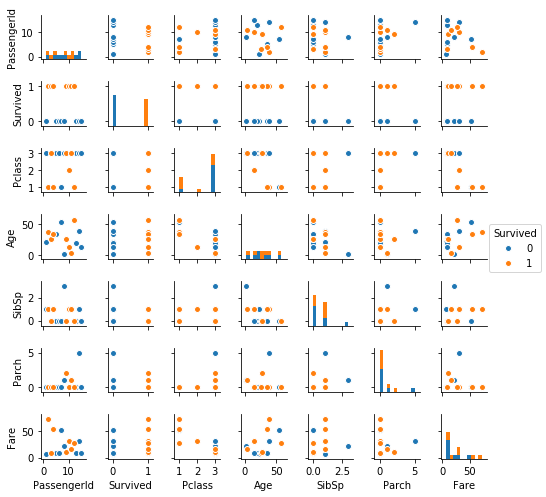

In [12]:
a = df_train.head(15)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot(a, hue='Survived', size=1.0)
plt.show()

In [13]:
a_1=e.loc[:,["Pclass","Fare"]]
b_1=e.loc[:,"Survived"]
X_1 = a_1.values
y_1 = b_1.values

In [14]:
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [32]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=100)
rbf_svm.fit(X_1_train, y_1_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()

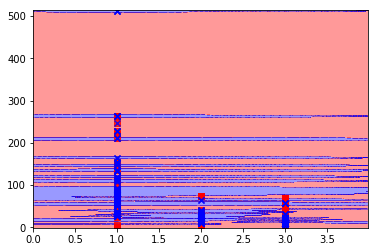

In [17]:
plot_decision_regions(X_1, y_1, classifier=rbf_svm)

In [33]:
rbf_svm.score(X_1_test, y_1_test)
#うまく分類できていないので、チューニングしてみる

0.71641791044776115

In [19]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_1_test, rbf_svm.predict(X_1_test))
cm_1

array([[139,  29],
       [ 47,  53]])

In [22]:
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() 
    plt.show()

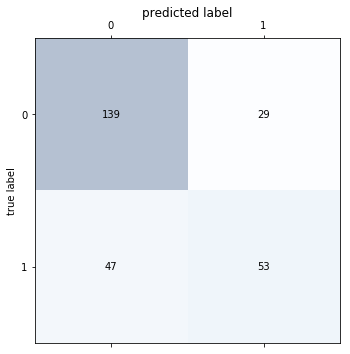

In [21]:
plot_cm(cm_1)
#0の分類よりも比較的1の分類ができていない

In [23]:
from sklearn import metrics
metrics.precision_score(y_1_test, rbf_svm.predict(X_1_test))
#偽陽性が多いのでやはり適合率が低い

0.64634146341463417

In [24]:
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gs_svc = GridSearchCV(SVC(), param_grid, cv=kf_5)

In [25]:
gs_svc.fit(X_1_train, y_1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [36]:
gs_svc.best_params_

{'C': 10000, 'gamma': 0.01}

In [37]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf', gamma=0.01, C=10000)
rbf_svm.fit(X_1_train, y_1_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
rbf_svm.score(X_1_test, y_1_test)
#チューニングしてみたが、大きく変化はなし

0.68656716417910446